# Supermarket_Sales

In [139]:
#importing libraries

In [73]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [74]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [75]:
df.shape

(1000, 17)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [77]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [78]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [79]:
df.duplicated().sum()

0

There is no null values or duplicate values

In [80]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [140]:
#transforming categorical variables into numericals

In [81]:
la=LabelEncoder()

In [82]:
df['Branch']=la.fit_transform(df['Branch'])
df['City']=la.fit_transform(df['City'])
df['Customer type']=la.fit_transform(df['Customer type'])
df['Gender']=la.fit_transform(df['Gender'])
df['Product line']=la.fit_transform(df['Product line'])
df['Payment']=la.fit_transform(df['Payment'])

In [83]:
df.drop(['Invoice ID'],axis=1,inplace=True)

In [84]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,2,522.83,4.761905,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,0,76.40,4.761905,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,1,324.31,4.761905,16.2155,7.4
3,0,2,0,1,3,58.22,8,23.2880,489.0480,1/27/2019,20:33,2,465.76,4.761905,23.2880,8.4
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2/8/2019,10:37,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,1,3,40.35,1,2.0175,42.3675,1/29/2019,13:46,2,40.35,4.761905,2.0175,6.2
996,1,0,1,0,4,97.38,10,48.6900,1022.4900,3/2/2019,17:16,2,973.80,4.761905,48.6900,4.4
997,0,2,0,1,2,31.84,1,1.5920,33.4320,2/9/2019,13:22,0,31.84,4.761905,1.5920,7.7
998,0,2,1,1,4,65.82,1,3.2910,69.1110,2/22/2019,15:33,0,65.82,4.761905,3.2910,4.1


In [85]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [86]:
df.drop(['Date'],axis=1,inplace=True)

In [87]:
df['Time']=pd.to_datetime(df['Time'],format='%H:%M')
df['Hour']=df['Time'].dt.hour
df['Minute']=df['Time'].dt.minute

In [88]:
df.drop(['Time'],axis=1,inplace=True)

In [141]:
#checking for outliers

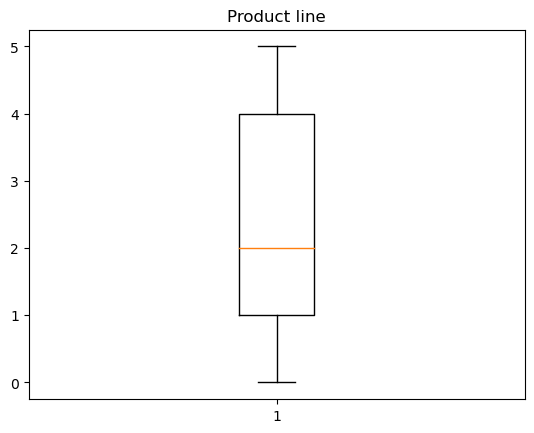

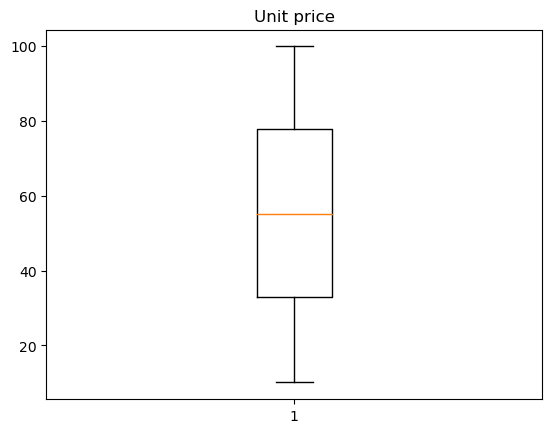

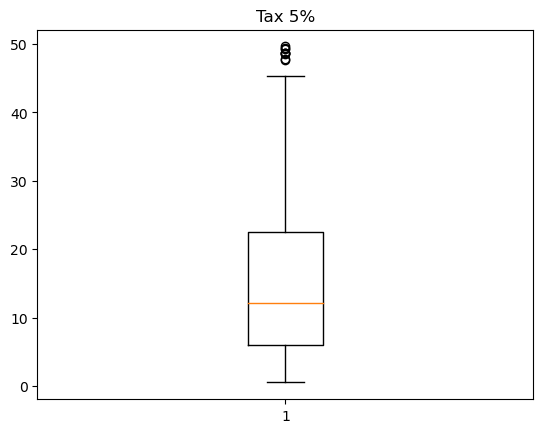

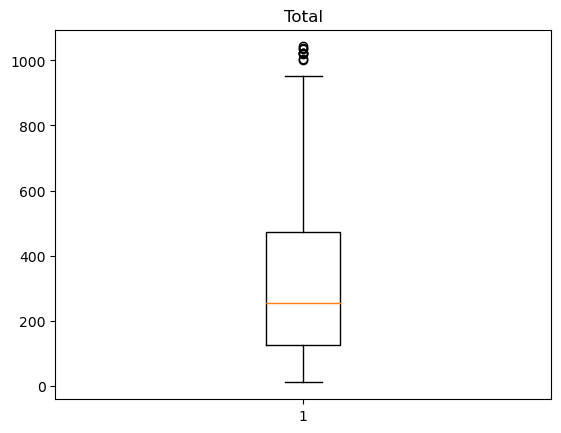

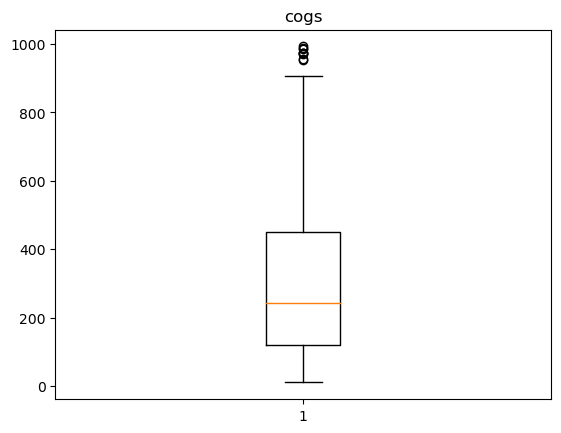

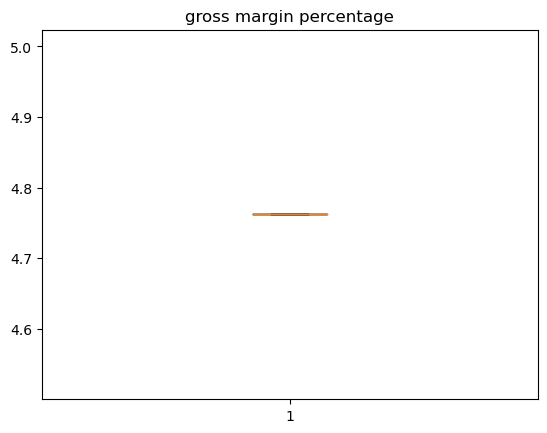

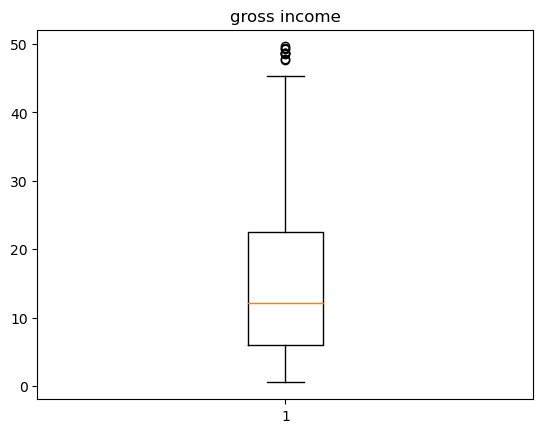

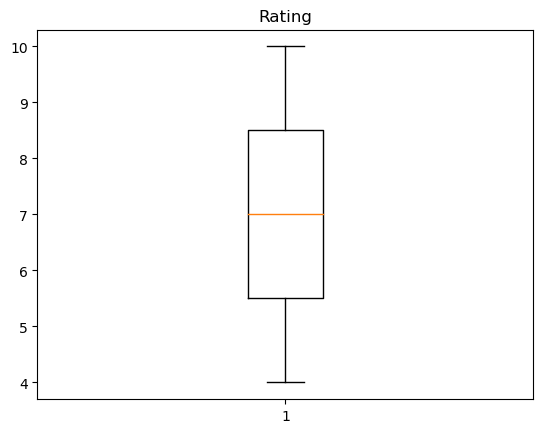

In [89]:
columns=['Product line', 'Unit price', 'Tax 5%', 'Total',
       'cogs', 'gross margin percentage', 'gross income',
       'Rating']
for cols in columns:
    plt.boxplot(df[cols])
    plt.title(cols)
    plt.show()

In [90]:
#tax5%,total,cogs,gross income


In [91]:
Q1=df['Tax 5%'].quantile(0.25)
Q3=df['Tax 5%'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['Tax 5%']<lower_lim) | (df['Tax 5%']>upper_lim)]
outlier.shape

(9, 19)

In [92]:
df=df[(df['Tax 5%']>lower_lim) & (df['Tax 5%']<upper_lim)]

In [93]:
Q1=df['Total'].quantile(0.25)
Q3=df['Total'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['Total']<lower_lim) | (df['Total']>upper_lim)]
outlier.shape

(0, 19)

In [94]:
df=df[(df['Total']>lower_lim) & (df['Total']<upper_lim)]

In [95]:
Q1=df['cogs'].quantile(0.25)
Q3=df['cogs'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['cogs']<lower_lim) | (df['cogs']>upper_lim)]
outlier.shape

(0, 19)

In [96]:
df=df[(df['cogs']>lower_lim) & (df['cogs']<upper_lim)]

In [97]:
Q1=df['gross income'].quantile(0.25)
Q3=df['gross income'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['gross income']<lower_lim) | (df['gross income']>upper_lim)]
outlier.shape

(0, 19)

In [98]:
df=df[(df['gross income']>lower_lim) & (df['gross income']<upper_lim)]

In [99]:
df.shape

(991, 19)

In [143]:
#applying minmax scalling for normalization

In [101]:
minmax=MinMaxScaler()

In [102]:
df['Total']=minmax.fit_transform(df[['Total']])

In [103]:
df['cogs']=minmax.fit_transform(df[['cogs']])

In [104]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour,Minute
0,0,2,0,0,3,74.69,7,26.1415,0.571955,2,0.571955,4.761905,26.1415,9.1,2019,1,5,13,8
1,2,1,1,0,0,15.28,5,3.8200,0.073890,0,0.073890,4.761905,3.8200,9.6,2019,3,8,10,29
2,0,2,1,1,4,46.33,7,16.2155,0.350474,1,0.350474,4.761905,16.2155,7.4,2019,3,3,13,23
3,0,2,0,1,3,58.22,8,23.2880,0.508284,2,0.508284,4.761905,23.2880,8.4,2019,1,27,20,33
4,0,2,1,1,5,86.31,7,30.2085,0.662702,2,0.662702,4.761905,30.2085,5.3,2019,2,8,10,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2,1,0,0,0,60.95,1,3.0475,0.056653,2,0.056653,4.761905,3.0475,5.9,2019,2,18,11,40
995,2,1,1,1,3,40.35,1,2.0175,0.033671,2,0.033671,4.761905,2.0175,6.2,2019,1,29,13,46
997,0,2,0,1,2,31.84,1,1.5920,0.024176,0,0.024176,4.761905,1.5920,7.7,2019,2,9,13,22
998,0,2,1,1,4,65.82,1,3.2910,0.062087,0,0.062087,4.761905,3.2910,4.1,2019,2,22,15,33


In [105]:
df.corr()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour,Minute
Branch,1.000000,-0.509695,-0.018644,-0.053119,-0.057181,0.018688,0.006374,0.024253,0.024253,-0.050576,0.024253,NaN,0.024253,0.014587,NaN,-0.029676,-0.013964,0.033859,0.038737
City,-0.509695,1.000000,0.006197,0.008586,0.012147,-0.011921,-0.000094,-0.009518,-0.009518,0.020697,-0.009518,NaN,-0.009518,0.045363,NaN,0.010336,0.005013,-0.062403,-0.065580
Customer type,-0.018644,0.006197,1.000000,0.037342,-0.043383,-0.025249,-0.021775,-0.029361,-0.029361,0.019434,-0.029361,NaN,-0.029361,0.021873,NaN,0.008441,0.038684,-0.017846,-0.013779
Gender,-0.053119,0.008586,0.037342,1.000000,0.005618,0.020548,-0.070712,-0.042631,-0.042631,0.046155,-0.042631,NaN,-0.042631,0.000071,NaN,0.027798,0.051253,0.084748,0.010817
Product line,-0.057181,0.012147,-0.043383,0.005618,1.000000,0.016208,0.016947,0.026449,0.026449,0.031149,0.026449,NaN,0.026449,-0.014941,NaN,-0.023001,-0.049549,-0.060191,0.016917
Unit price,0.018688,-0.011921,-0.025249,0.020548,0.016208,1.000000,-0.011506,0.623355,0.623355,-0.018341,0.623355,NaN,0.623355,-0.002527,NaN,-0.020323,0.061958,0.007786,-0.005438
Quantity,0.006374,-0.000094,-0.021775,-0.070712,0.016947,-0.011506,1.000000,0.699290,0.699290,-0.005856,0.699290,NaN,0.699290,-0.009694,NaN,-0.007322,-0.039941,-0.007814,-0.013675
Tax 5%,0.024253,-0.009518,-0.029361,-0.042631,0.026449,0.623355,0.699290,1.000000,1.000000,-0.016811,1.000000,NaN,1.000000,-0.026092,NaN,-0.009271,0.004982,-0.003834,-0.025833
Total,0.024253,-0.009518,-0.029361,-0.042631,0.026449,0.623355,0.699290,1.000000,1.000000,-0.016811,1.000000,NaN,1.000000,-0.026092,NaN,-0.009271,0.004982,-0.003834,-0.025833
Payment,-0.050576,0.020697,0.019434,0.046155,0.031149,-0.018341,-0.005856,-0.016811,-0.016811,1.000000,-0.016811,NaN,-0.016811,-0.005379,NaN,0.030546,-0.004888,0.041094,0.004031


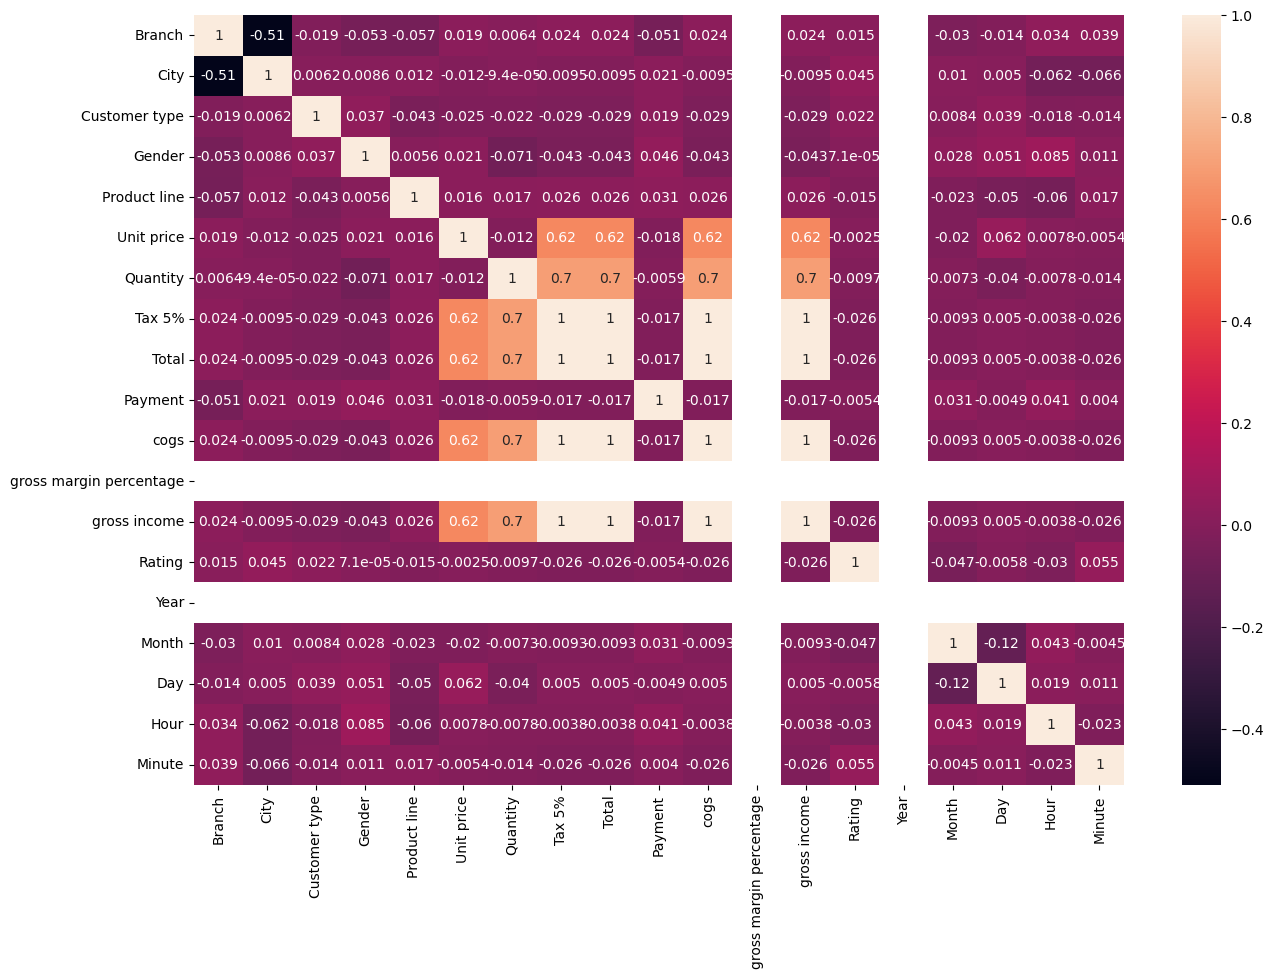

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#splitting of data

In [107]:
x=df.drop('Customer type',axis=1)

In [108]:
y=df['Customer type']

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [112]:
predicted=dtree.predict(x_test)

In [113]:
accuracy=accuracy_score(y_test,predicted)

In [114]:
accuracy

0.5033557046979866

The accuracy of the model is approximately 50.34%, which indicates the proportion of correctly classified instances. In your case, the accuracy is relatively low, suggesting that the model's overall predictive power is not strong.

In [115]:
print(confusion_matrix(y_test,predicted))

[[85 68]
 [80 65]]


The model made 85 correct predictions for class 0 (true negatives), 65 correct predictions for class 1 (true positives), but it also made 68 false positive predictions and 80 false negative predictions. This indicates that the model has difficulty distinguishing between the two classes.

In [116]:
print(classification_report(y_test,predicted))


              precision    recall  f1-score   support

           0       0.52      0.56      0.53       153
           1       0.49      0.45      0.47       145

    accuracy                           0.50       298
   macro avg       0.50      0.50      0.50       298
weighted avg       0.50      0.50      0.50       298



 For class 0, the precision is 0.52, and for class 1, it is 0.49. These values indicate the proportion of positive predictions that were actually correct.
 
 For class 0, the recall is 0.56, and for class 1, it is 0.45. These values indicate the proportion of actual positives that the model correctly identified.
 
 The F1-Score is the harmonic mean of precision and recall and provides a balanced measure of the model's performance. For class 0, the F1-Score is 0.53, and for class 1, it is 0.47.

In [117]:
dtree.feature_importances_

array([0.03556619, 0.01077461, 0.00650043, 0.03942243, 0.11708264,
       0.05367116, 0.03917524, 0.07311227, 0.02496877, 0.04178737,
       0.        , 0.06785921, 0.1072418 , 0.        , 0.01641205,
       0.08954234, 0.10675299, 0.17013049])

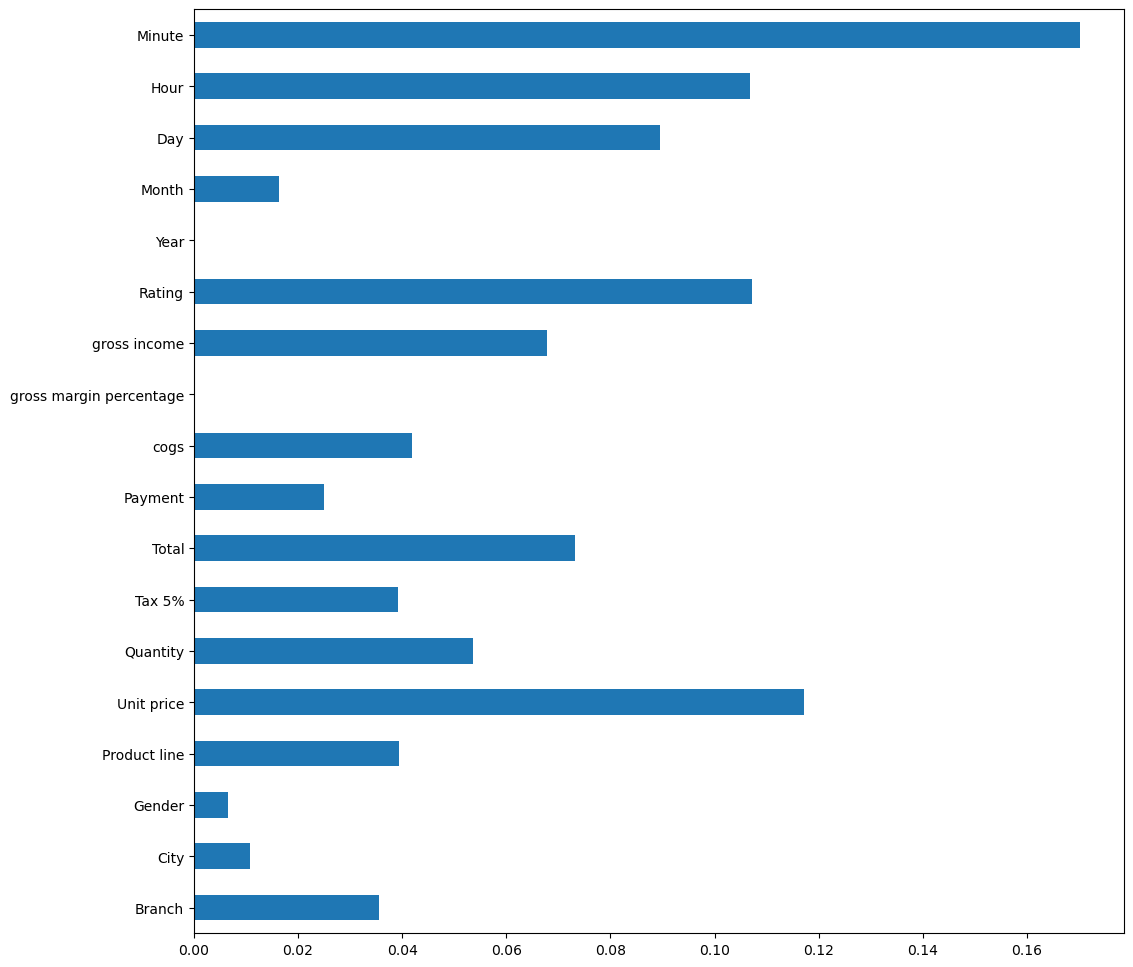

In [118]:
plt.figure(figsize=(12,12))
(pd.Series(dtree.feature_importances_,index=x.columns).plot(kind='barh'))
plt.show()

In [119]:
df1=df.copy()

In [120]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

In [121]:
df1.drop(['Branch', 'City','Gender','Product line','Payment','gross margin percentage', 'gross income','Year', 'Month'],axis=1,inplace=True)

In [122]:
df1

,Customer type,Unit price,Quantity,Tax 5%,Total,cogs,Rating,Day,Hour,Minute
0,0,74.69,7,26.1415,0.571955,0.571955,9.1,5,13,8
1,1,15.28,5,3.8200,0.073890,0.073890,9.6,8,10,29
2,1,46.33,7,16.2155,0.350474,0.350474,7.4,3,13,23
3,0,58.22,8,23.2880,0.508284,0.508284,8.4,27,20,33
4,1,86.31,7,30.2085,0.662702,0.662702,5.3,8,10,37
...,...,...,...,...,...,...,...,...,...,...
994,0,60.95,1,3.0475,0.056653,0.056653,5.9,18,11,40
995,1,40.35,1,2.0175,0.033671,0.033671,6.2,29,13,46
997,0,31.84,1,1.5920,0.024176,0.024176,7.7,9,13,22
998,1,65.82,1,3.2910,0.062087,0.062087,4.1,22,15,33


In [123]:
x=df1.drop('Customer type',axis=1)

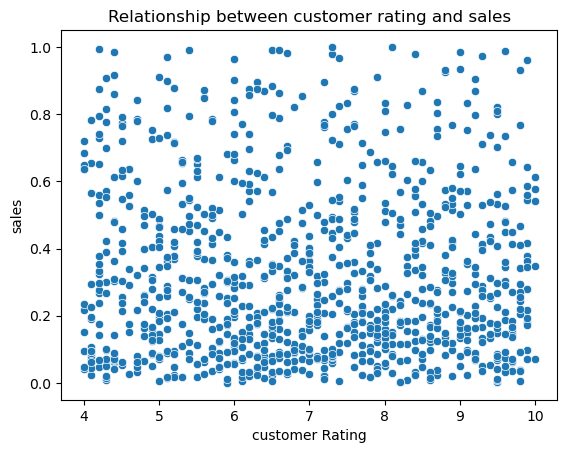

In [124]:
sns.scatterplot(data=df1,x='Rating',y='Total')
plt.xlabel('customer Rating')
plt.ylabel('sales')
plt.title('Relationship between customer rating and sales')
plt.show()

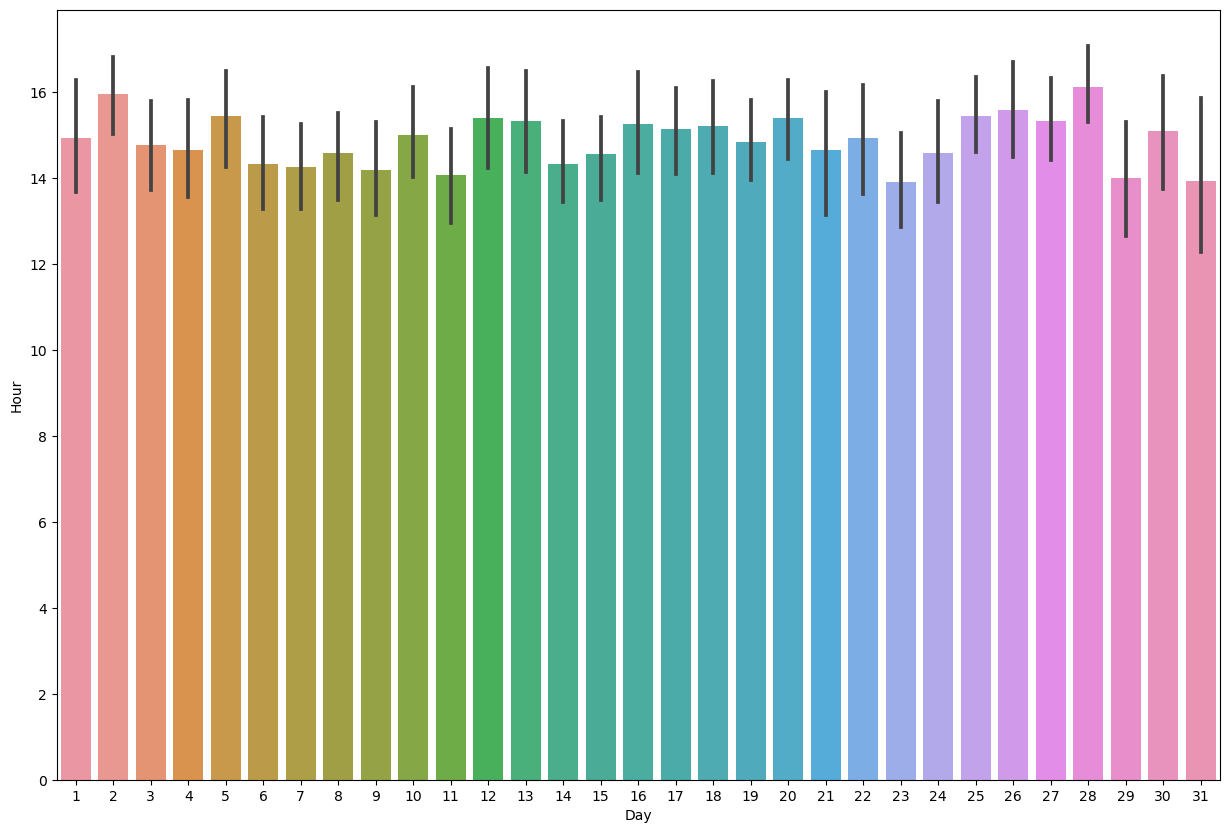

In [125]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df1,x='Day',y='Hour')
plt.show()

In [126]:
df.groupby(['Day','Month']).size().reset_index().groupby('Month')[[0]].max()

,0
Month,
1,18
2,20
3,18


In [127]:
total=df['Total'].sum()

In [128]:
total

322.1314805930851

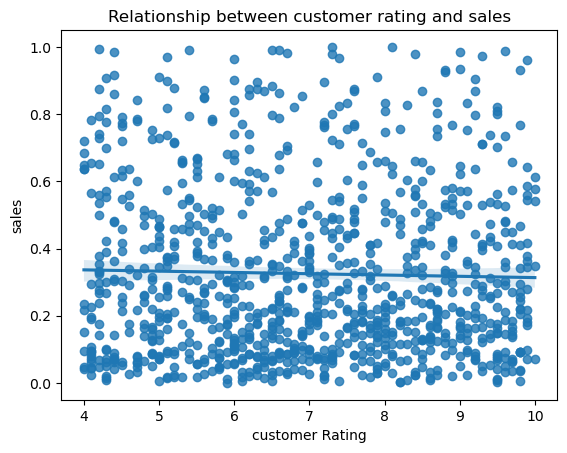

In [129]:
sns.regplot(data=df1,x='Rating',y='Total')
plt.xlabel('customer Rating')
plt.ylabel('sales')
plt.title('Relationship between customer rating and sales')
plt.show()

In [130]:
x1=df.drop('Customer type',axis=1)

In [131]:
y1=df['Customer type']

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [133]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [134]:
predicted=dtree.predict(x_test)

In [135]:
accuracy=accuracy_score(y_test,predicted)

In [136]:
accuracy

0.5536912751677853

The accuracy of the model has increased to approximately 55.37%, which indicates an improvement in correctly classified instances.

In [137]:
print(confusion_matrix(y_test,predicted))

[[85 68]
 [65 80]]


The updated confusion matrix shows 85 correct predictions for class 0 (true negatives) and 80 correct predictions for class 1 (true positives). There are still 68 false positive predictions and 65 false negative predictions, but the model's performance has improved iN terms of true positives.

In [138]:
print(classification_report(y_test,predicted))


              precision    recall  f1-score   support

           0       0.57      0.56      0.56       153
           1       0.54      0.55      0.55       145

    accuracy                           0.55       298
   macro avg       0.55      0.55      0.55       298
weighted avg       0.55      0.55      0.55       298



Precision values have increased for both classes, with class 0 precision at 0.57 and class 1 precision at 0.54. These values indicate a better proportion of positive predictions that are correct.

Recall values have also improved for both classes, with class 0 recall at 0.56 and class 1 recall at 0.55, indicating better identification of actual positives.

F1-Score values for both classes have increased, with class 0 at 0.56 and class 1 at 0.55.

## Conclusion

The model's performance improved after dropping the specified columns, resulting in a more accurate and reliable classification model.

The initial model had difficulty distinguishing between classes, but the adjustments led to a more balanced classification with fewer false positives and false negatives.

It's important to carefully consider feature selection and engineering in classification tasks, as it can significantly impact the model's effectiveness.

In any data science or machine learning project, it's crucial to iteratively assess and fine-tune your models to achieve the best possible results. Additionally, further exploration of other modeling techniques and feature engineering may lead to even better performance